In [4]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import netron

In [3]:
pip install netron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.7 MB/s eta 0:00:00


In [5]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Defining the model
model = keras.Sequential([
    keras.layers.Input(shape=(20,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 [==============================] - 2s 26ms/step - loss: 0.6072 - accuracy: 0.7016 - val_loss: 0.4952 - val_accuracy: 0.8562
Epoch 2/50
20/20 [==============================] - 0s 8ms/step - loss: 0.4683 - accuracy: 0.8328 - val_loss: 0.3878 - val_accuracy: 0.8750
Epoch 3/50
20/20 [==============================] - 0s 8ms/step - loss: 0.3870 - accuracy: 0.8531 - val_loss: 0.3213 - val_accuracy: 0.8938
Epoch 4/50
20/20 [==============================] - 0s 12ms/step - loss: 0.3450 - accuracy: 0.8641 - val_loss: 0.2905 - val_accuracy: 0.8875
Epoch 5/50
20/20 [==============================] - 0s 9ms/step - loss: 0.3163 - accuracy: 0.8672 - val_loss: 0.2777 - val_accuracy: 0.8750
Epoch 6/50
20/20 [==============================] - 0s 9ms/step - loss: 0.2982 - accuracy: 0.8859 - val_loss: 0.2604 - val_accuracy: 0.8875
Epoch 7/50
20/20 [==============================] - 0s 9ms/step - loss: 0.2838 - accuracy: 0.8781 - val_loss: 0.2588 - val_accuracy: 0.8687
Epoch 8/50
20/20 [

In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.8250


In [12]:
# Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int).flatten()

7/7 [==============================] - 0s 3ms/step


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7201 (28.13 KB)
Trainable params: 7201 (28.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Save your model
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# Open the model in netron
netron.start('my_model.h5')

Serving 'my_model.h5' at http://localhost:8081


('localhost', 8081)

In [16]:
# Plot training history
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

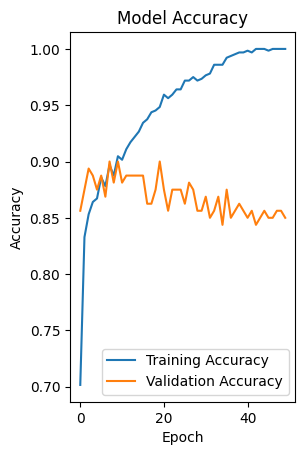

In [17]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

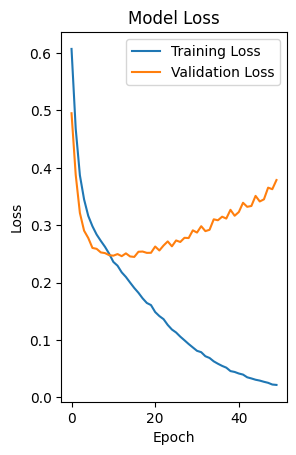

In [18]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [19]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>